This noteboook is based on the stan manual section on [Ordinary Differential Equations](https://mc-stan.org/docs/stan-users-guide/ode-solver.html). 

In [2]:
import os
from cmdstanpy import CmdStanModel
import pandas as pd
import matplotlib.pyplot as plt

"ode.stan" has no model, only generated_quantities to simulate data.

In [3]:
stan_file = os.path.join(os.getcwd(), 'ode.stan')
model = CmdStanModel(stan_file=stan_file)

In [4]:
data = {
 "T" : 10,
 "y0" : [1.0, 0.0],
 "t0" : 0.0,
 "ts" : [float(i) for i in range(1,11)],
 "theta" : 0.15
}

Run 'sample' even though there is no model.

In [5]:
fit = model.sample(data = data, chains=1, iter_sampling=1)

15:38:53 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

15:38:53 - cmdstanpy - INFO - CmdStan done processing.


Get the draws and re-organize as data for the fit.

In [6]:
sim = fit.draws_pd()
sim = pd.melt(sim)
y = [[sim.value[i], sim.value[i+10]] for i in range(2,12)] 

In [7]:
y

[[0.490071, -0.841345],
 [-0.252162, -0.799312],
 [-0.659827, 0.0244664],
 [-0.605858, 0.697643],
 [0.142776, 0.59941],
 [0.554621, 0.159638],
 [0.435004, -0.170081],
 [0.156092, -0.528226],
 [-0.404055, -0.0681139],
 [-0.488825, 0.257444]]

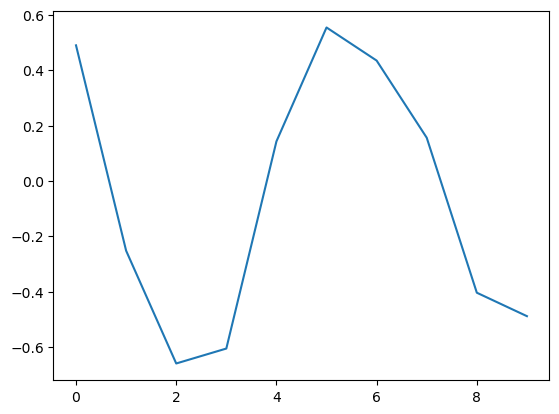

In [8]:
plt.plot([y[i][0] for i in range(len(y))])

Add the data

In [11]:
data2 =   data.copy()
data2["y"] =y
data2.pop("y0")

[1.0, 0.0]

This stan file does have the model

In [9]:
stan_file = os.path.join(os.getcwd(), 'odefit.stan')
model = CmdStanModel(stan_file=stan_file)

In [12]:
fit = model.sample(data = data2)

15:40:07 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

15:40:36 - cmdstanpy - INFO - CmdStan done processing.
15:40:36 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'C:/Users/rjljr/devel/stantest/odefit.stan', line 23, column 2 to column 59)
	Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'C:/Users/rjljr/devel/stantest/odefit.stan', line 23, column 2 to column 59)
	Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'C:/Users/rjljr/devel/stantest/odefit.stan', line 23, column 2 to column 59)
	Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'C:/Users/rjljr/devel/stantest/odefit.stan', line 23, column 2 to column 59)
	Exception: ode_rk45:  Failed to integrate to next output time (1) in less than max_num_steps steps (in 'C:/Users/rjljr/devel/stantest/odefit.stan', line 23

In [13]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,29.958500,0.048716,1.712740,26.586300,30.282500,32.038900,1236.09000,521.1160,1.00501
y0[1],1.011260,0.003179,0.108552,0.835546,1.010160,1.189480,1165.83000,491.4980,1.00303
y0[2],-0.019161,0.001902,0.073542,-0.145231,-0.014043,0.092841,1494.26000,629.9590,1.00054
sigma[1],0.107259,0.000864,0.034467,0.063836,0.100857,0.171193,1592.79000,671.4950,1.00182
sigma[2],0.127483,0.001030,0.041560,0.078202,0.119271,0.207389,1627.57000,686.1610,1.00170
theta,0.179120,0.001290,0.044130,0.107950,0.179050,0.252350,1167.79869,492.3266,1.00258


Even though one of the chains got stuck, the fit is pretty close.

array([[<Axes: title={'center': 'theta'}>]], dtype=object)

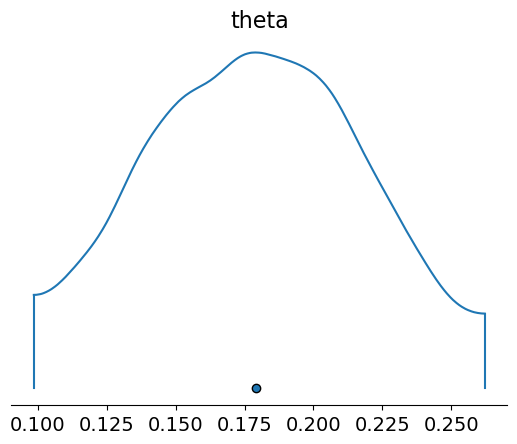

In [14]:
import arviz as az
az.plot_density(fit, var_names=["theta"])

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

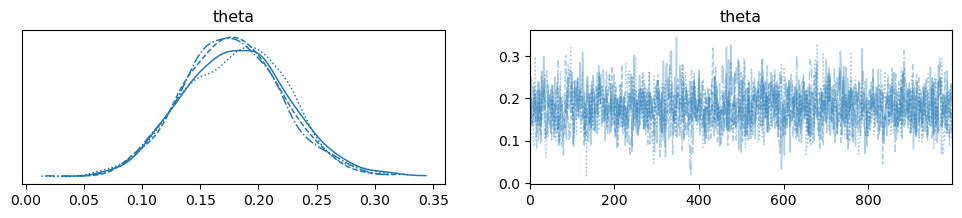

In [15]:
az.plot_trace(fit, var_names=['theta'])